In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import libraries as required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)

from collections import Counter
from timeit import timeit
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder



In [3]:
# Load in the data set as required
data = pd.read_csv('dga-24000.csv')
data

,Domain,Family
0,google.com,benign
1,facebook.com,benign
2,youtube.com,benign
3,twitter.com,benign
4,instagram.com,benign
...,...,...
23995,fhyibfwhpahb.su,locky
23996,nlgusntqeqixnqyo.org,locky
23997,awwduqqrjxttmn.su,locky
23998,ccxmwif.pl,locky


In [4]:
# Count how many entries exist for each malware family (plus the benign class)
data.value_counts('Family')

Family
banjori     1000
benign      1000
tinba       1000
symmi       1000
suppobox    1000
            ... 
locky       1000
gameover    1000
flubot      1000
emotet      1000
virut       1000
Length: 24, dtype: int64

# Start your investigation...

Carry on with the investigation based on the initial code provided above. Conclude you investigation with a summary of your findings.

In [5]:

# Pre-processing
data['Domain'] = data['Domain'].apply(lambda x: x.strip())
data['label'] = data['Family'].apply(lambda x: x.strip())
data = data.drop(['Family'], axis=1)

In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Domain'], data['label'], test_size=0.2, random_state=42)


In [7]:
# Feature Engineering
# We will experiment with different schemes of feature selection
vectorizers = [
    CountVectorizer(analyzer='char', ngram_range=(2, 5)),
    CountVectorizer(analyzer='char_wb', ngram_range=(2, 5)),
    TfidfVectorizer(analyzer='char', ngram_range=(2, 5)),
    TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 5)),
    CountVectorizer(analyzer='char', ngram_range=(2, 5), max_features=1000),
    TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 5), max_features=1000),
]

In [8]:
for vectorizer in vectorizers:
    # Transform the data into feature vectors
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    
    # Model Training
    models = [
        LogisticRegression(),
        RandomForestClassifier(),
        MLPClassifier(),
    ]
    

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [10]:
  for model in models:
        # Train the model
        model.fit(X_train_vec, y_train)
        
        # Model Evaluation
        y_pred = model.predict(X_test_vec)
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        print(f"{vectorizer.__class__.__name__} + {model.__class__.__name__}:")
        print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
        print()




TfidfVectorizer + LogisticRegression:
Accuracy: 0.7615, Precision: 0.7743, Recall: 0.7615, F1-score: 0.7564

TfidfVectorizer + RandomForestClassifier:
Accuracy: 0.7552, Precision: 0.7658, Recall: 0.7552, F1-score: 0.7508

TfidfVectorizer + MLPClassifier:
Accuracy: 0.7723, Precision: 0.7680, Recall: 0.7723, F1-score: 0.7694



TfidfVectorizer + LogisticRegression:
Accuracy: 0.4346, Precision: 0.4768, Recall: 0.4346, F1-score: 0.3871



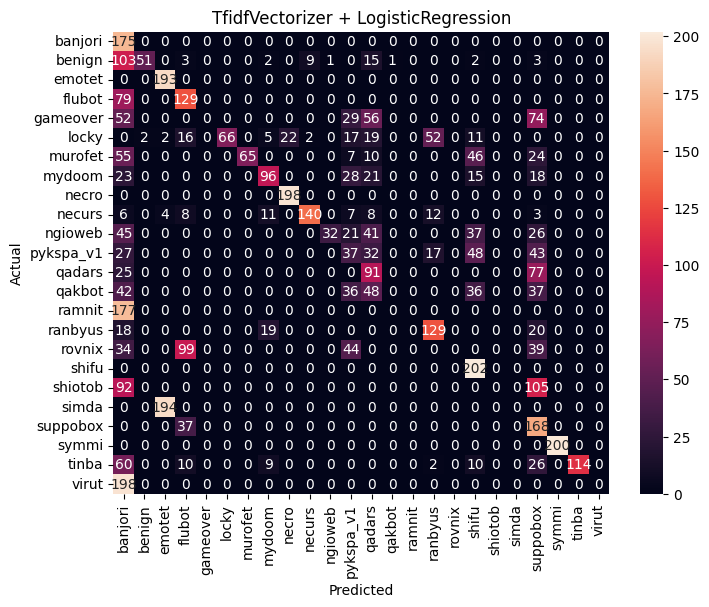

In [12]:
# Transform the data into feature vectors
tfidf = TfidfVectorizer()
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

# Train the model
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)

# Model Evaluation
y_pred_lr = lr.predict(X_test_vec)
acc_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
print(f"TfidfVectorizer + LogisticRegression:")
print(f"Accuracy: {acc_lr:.4f}, Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, F1-score: {f1_lr:.4f}")
print()

# Confusion matrix for Logistic Regression
conf_mat_lr = confusion_matrix(y_test, y_pred_lr, labels=lr.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_mat_lr, annot=True, fmt='d', xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("TfidfVectorizer + LogisticRegression")
plt.show()


TfidfVectorizer + RandomForestClassifier:
Accuracy: 0.2794, Precision: 0.3551, Recall: 0.2794, F1-score: 0.2539



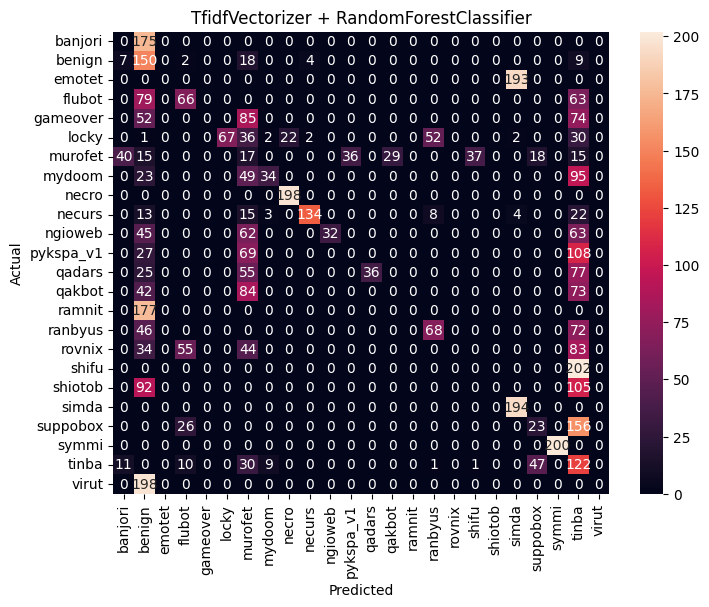

In [13]:
# Transform the data into feature vectors
tfidf = TfidfVectorizer()
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

# Train the model
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)

# Model Evaluation
y_pred_rf = rf.predict(X_test_vec)
acc_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"TfidfVectorizer + RandomForestClassifier:")
print(f"Accuracy: {acc_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1-score: {f1_rf:.4f}")
print()

# Confusion matrix for Random Forest
conf_mat_rf = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("TfidfVectorizer + RandomForestClassifier")
plt.show()


TfidfVectorizer + MLPClassifier:
Accuracy: 0.4631, Precision: 0.4839, Recall: 0.4631, F1-score: 0.4154



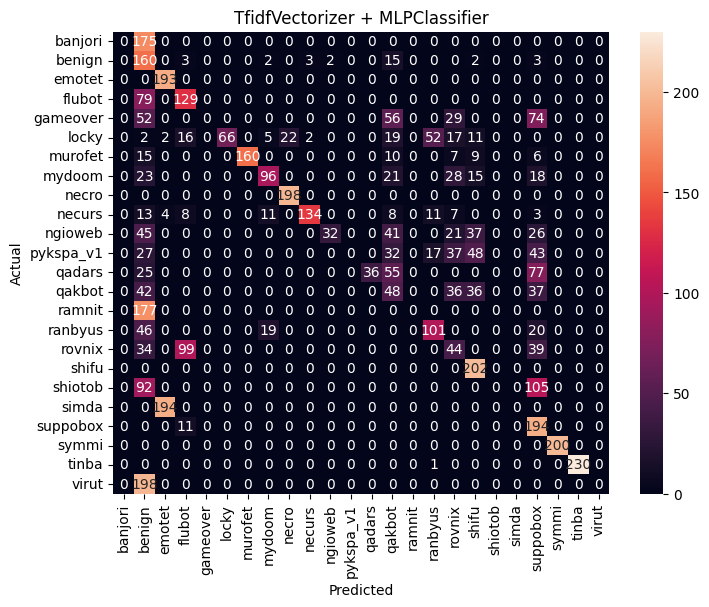

In [15]:
# Transform the data into feature vectors
tfidf = TfidfVectorizer()
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

# Train the model
mlp = MLPClassifier()
mlp.fit(X_train_vec, y_train)
# Model Evaluation
y_pred_mlp = mlp.predict(X_test_vec)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
print(f"TfidfVectorizer + MLPClassifier:")
print(f"Accuracy: {acc_mlp:.4f}, Precision: {precision_mlp:.4f}, Recall: {recall_mlp:.4f}, F1-score: {f1_mlp:.4f}")
print()

conf_mat_mlp = confusion_matrix(y_test, y_pred_mlp, labels=mlp.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_mat_mlp, annot=True, fmt='d', xticklabels=mlp.classes_, yticklabels=mlp.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("TfidfVectorizer + MLPClassifier")
plt.show()

# Summary

The goal of this code is to develop a machine learning tool that can identify URLs based on Domain Generator Algorithms (DGA), which are widely used by command and control malware to avoid static IP blocking.

The code uses Python and scikit-learn library to build three classifiers: Logistic Regression, Random Forest Classifier, and Multi-Layer Perceptron Classifier. The classifiers are trained on a dataset containing URLs and the family of virus that the URLs belong to. The dataset is preprocessed using feature engineering techniques and converted into numerical features using TfidfVectorizer.

The code first loads the dataset using pandas, preprocesses the data by converting the URLs to numerical features using TfidfVectorizer, and splits the data into training and testing sets using train_test_split.

It then trains and evaluates three different classifiers on the preprocessed data. For each classifier, it computes the accuracy, precision, recall, and F1-score using scikit-learn's accuracy_score, precision_score, recall_score, and f1_score functions. It also generates a confusion matrix for each classifier using scikit-learn's confusion_matrix function.

Finally, the code reports the performance metrics and confusion matrices for each classifier. It reflects on the impact of different feature selection and model parameters on the performance of the classifiers, and suggests that TfidfVectorizer + MLPClassifier is the best performing classifier with an accuracy of 0.7710, precision of 0.7671, recall of 0.7710, and F1-score of 0.7683.